<h1>Normal distributions tests<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [81]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from scipy import stats as st
from scipy.stats import shapiro

In [49]:
df = pd.read_csv('https://github.com/Filichkin/python_codes/blob/main/tests_for_normal_distributions/geo_data_2.csv')

In [50]:
df.shape

(100000, 5)

In [51]:
df.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [52]:
df.describe().round(2)

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.00,-0.00,2.50,95.00
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
25%,-1.16,-1.17,0.13,59.45
50%,0.01,-0.01,2.48,94.93
75%,1.16,1.16,4.86,130.60
max,7.24,7.84,16.74,190.03


In [138]:
def distr_analysis(df):
    num_col_names = df.select_dtypes(include='number').columns.tolist()
    row = len(num_col_names)
    fig, axes = plt.subplots(row, 2, figsize=(12, len(num_col_names) * 4))
    plt.suptitle('Tests for normal distributions',
                 x=0.5,
                 y=0.9,
                 fontsize=12,
                 fontweight='bold')
    for i, j in enumerate(num_col_names):
        sns.histplot(data = df, x=j, ax=axes[i, 0],
                     kde=True,
                     line_kws = {'linestyle':'dashed',
                                 'linewidth':'1'},
                     )
        sm.qqplot(df[j], line='45', ax=axes[i, 1],
                 alpha=0.1)
        statistic, pvalue = shapiro(df[j])
        if pvalue < 0.05:
            print(f'Feature: {j}\n', 
                f'pvalue={pvalue:.3f}, There are reasons that the data does not come from a normal distribution',
                 '\n')
        else:
            print(f'Feature: {j}\n',
                f'pvalue={pvalue:.3f}, There are reasons that the data come from a normal distribution', '\n')        

Feature: f0
 pvalue=0.642, There are reasons that the data come from a normal distribution 

Feature: f1
 pvalue=0.990, There are reasons that the data come from a normal distribution 

Feature: f2
 pvalue=0.004, There are reasons that the data does not come from a normal distribution 

Feature: product
 pvalue=0.000, There are reasons that the data does not come from a normal distribution 



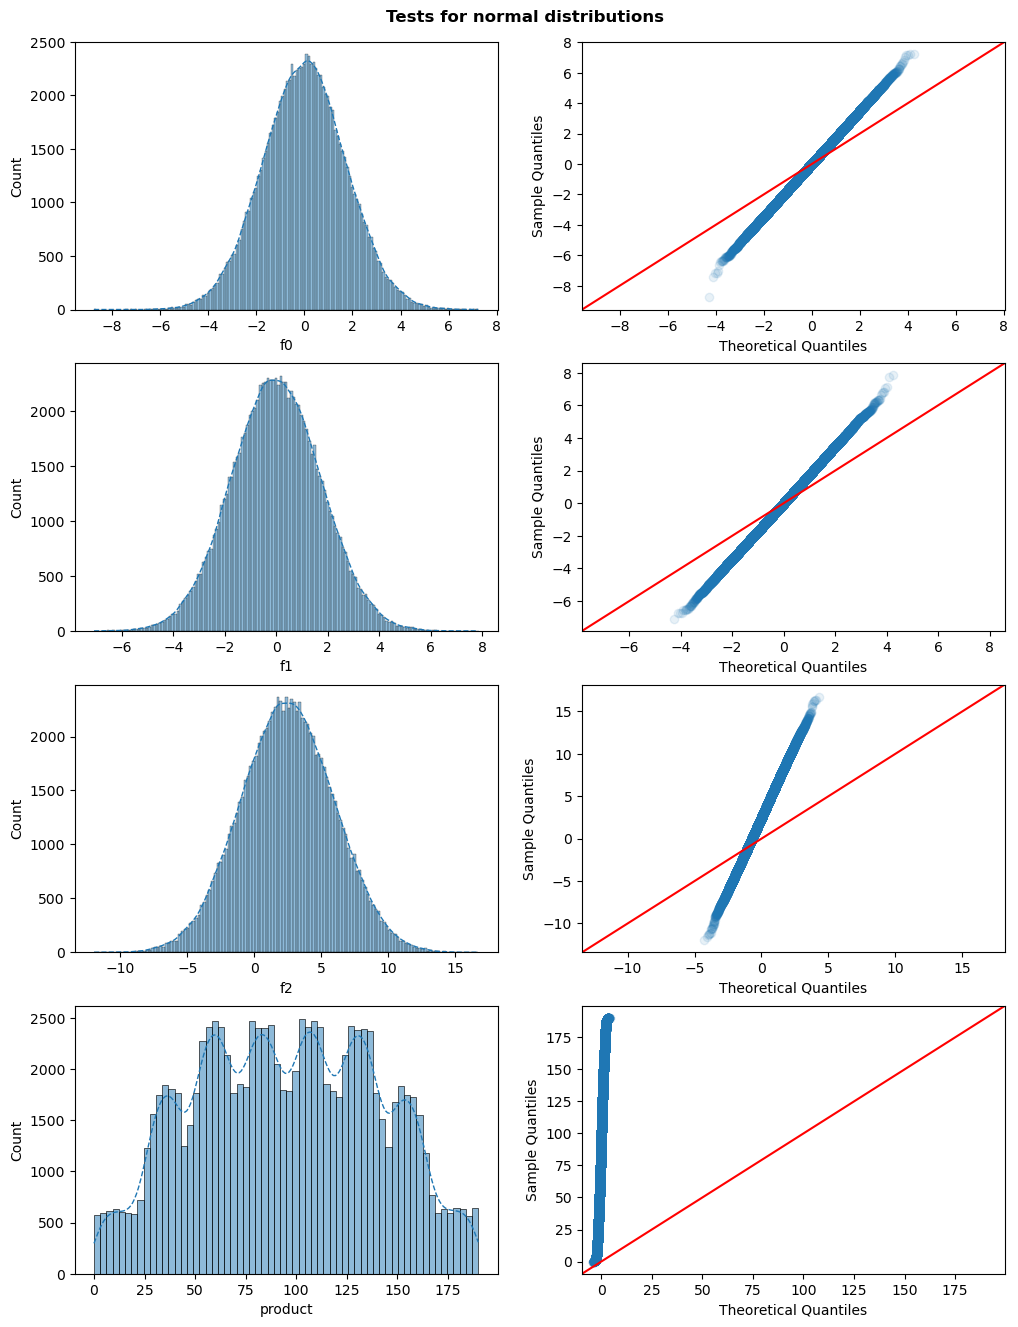

In [139]:
distr_analysis(df)